<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Gutiérrez

### **Link de repositorio de GitHub:** `https://github.com/LuisGutierrezG/LuisGutierrezG-LABS`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

In [2]:
#!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance


seed = 123

In [8]:
# se entrenará un modelo de clasificación para predecir si un paciente tiene diabetes o no a partir de la columna Diabetes
# se utilizará el algoritmo XGBoost

# se separan las variables independientes de la variable dependiente
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']


# se separan los datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


In [10]:
# se crea el modelo
model = XGBClassifier()

# se entrena el modelo
model.fit(X_train, y_train)

# se hacen las predicciones
y_pred = model.predict(X_test)


# se calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.89%


In [11]:
# se imprime el reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10695
         1.0       0.72      0.80      0.76     10513

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

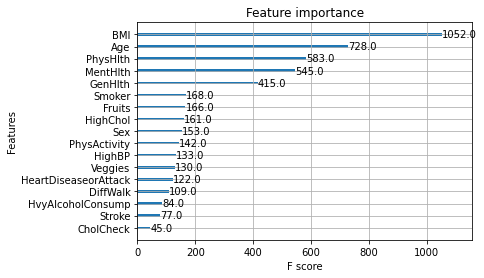

In [15]:
# se grafica la importancia de las variables
plot_importance(model, importance_type='weight')
plt.show()

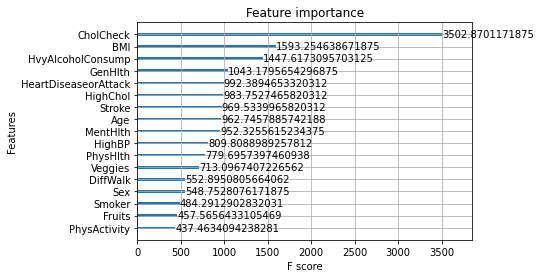

In [13]:
# se ve la importancia segun el metodo cover
plot_importance(model, importance_type='cover')
plt.show()


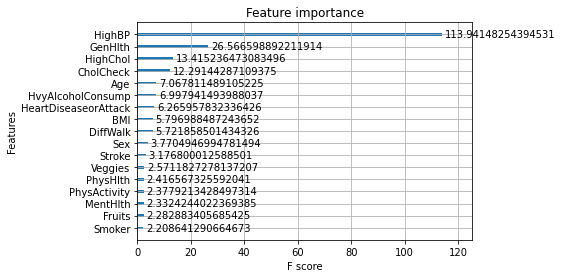

In [14]:
# se ve la importancia segun el metodo gain
plot_importance(model, importance_type='gain')
plt.show()


Podemos apreciar que hay 5 variables que parecieran ser más relevantes que el resto, estas son: `Glucose`, `BMI`, `Age`, `DiabetesPedigreeFunction` y `BloodPressure`. Sin embargo, no podemos asegurar que estas variables sean las más importantes, ya que el método utilizado para calcular la importancia de las variables es el método `weight`, el cual se basa en la cantidad de veces que una variable es utilizada para dividir un nodo. Esto no necesariamente significa que la variable sea importante, ya que puede ser que la variable sea utilizada para dividir un nodo en un árbol que no sea importante. Por lo que debemos complementar en análisis.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [17]:
# se calcula la importancia de las variables
results = permutation_importance(model, X, y, scoring='accuracy', random_state=seed)


# se crea un dataframe con la importancia de las variables
names = X.columns
importance = pd.DataFrame({'Variable': names, 'Importance': results.importances_mean})
importance = importance.sort_values(by='Importance', ascending=False)
importance

,Variable,Importance
11,GenHlth,0.063696
4,BMI,0.046729
0,Age,0.038856
16,HighBP,0.018845
2,HighChol,0.015096
13,PhysHlth,0.009370
12,MentHlth,0.008966
6,HeartDiseaseorAttack,0.006131
10,HvyAlcoholConsump,0.005322
3,CholCheck,0.004764


## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [1]:
# !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 38.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


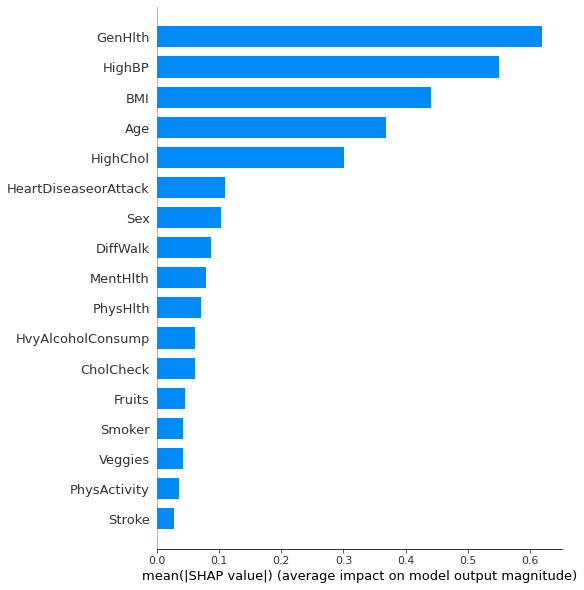

In [33]:
# se calculan los shapley values
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap_values 
# se muestran los valores shapley de las variables
shap.summary_plot(shap_values, X, plot_type="bar")




In [ ]:
# se grafican los shapley values
#shap.summary_plot(shap_values, X, plot_type="bar")

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [22]:
# Inserte código para generar gráficos de aporte local aquí
# se grafica el aporte local de las variables para las observaciones 1, 9 y 150
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9,:], X.iloc[9,:])


In [25]:

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[150,:], X.iloc[150,:])

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

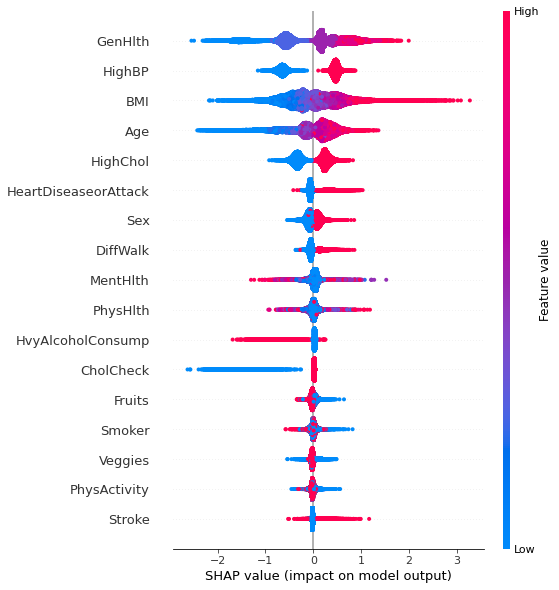

In [26]:
# Inserte código para generar gráficos de aporte global aquí
# Se visualiza el aporte de cada feature a nivel global
shap.summary_plot(shap_values, X)



### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [56]:
variables_importantes = importance['Variable'].head(5).tolist()
variables_importantes

['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol']

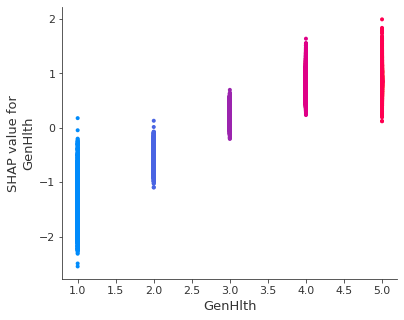

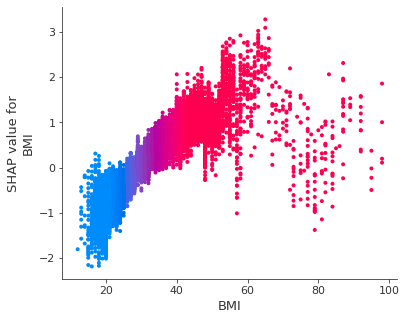

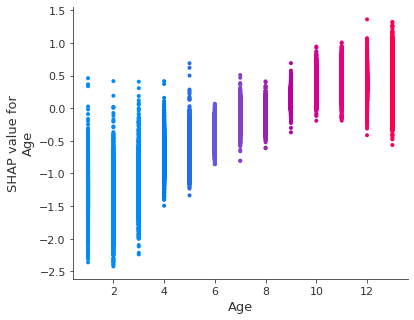

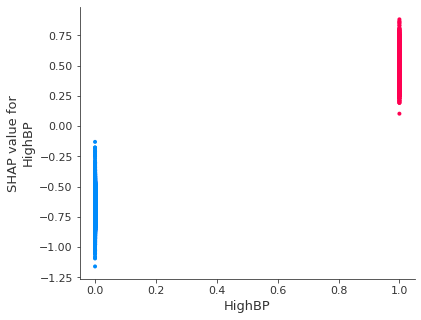

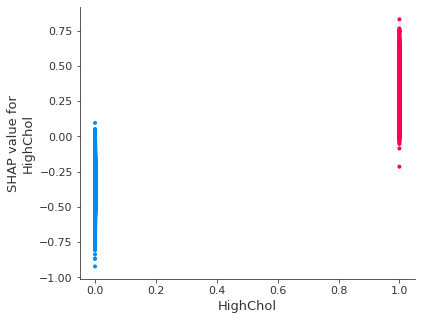

In [60]:
# Inserte código para generar gráficos de feature vs shap value aquí
# se grafica un scatterplot entre los shap values y las 5 features más importantes según el modelo, coloreando cada punto según el valor de la variable Diabetes
shap.dependence_plot(variables_importantes[0], shap_values, X, interaction_index=variables_importantes[0])
shap.dependence_plot(variables_importantes[1], shap_values, X, interaction_index=variables_importantes[1])
shap.dependence_plot(variables_importantes[2], shap_values, X, interaction_index=variables_importantes[2])
shap.dependence_plot(variables_importantes[3], shap_values, X, interaction_index=variables_importantes[3])
shap.dependence_plot(variables_importantes[4], shap_values, X, interaction_index=variables_importantes[4])

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [52]:
# se obtiene una submuestra de 1000 observaciones
X_sample = X.sample(n=1000, random_state=seed)

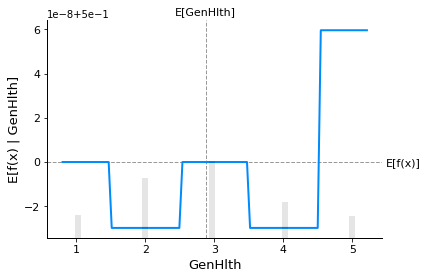

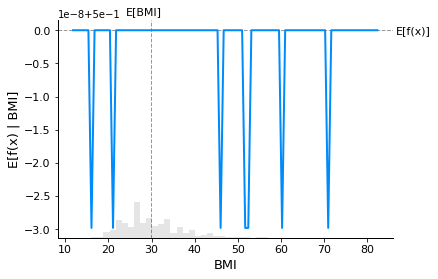

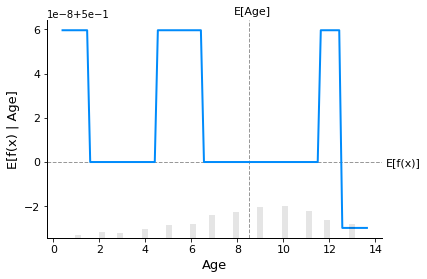

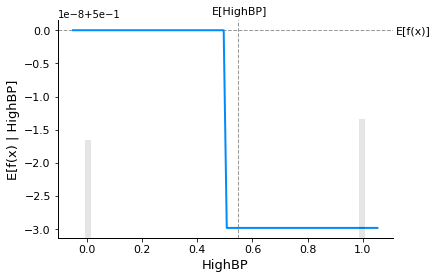

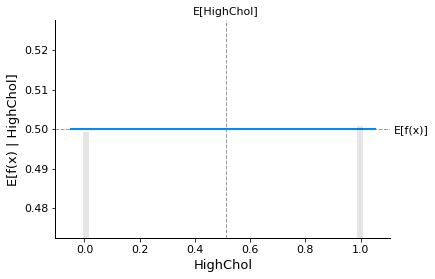

In [62]:
# se genera un grafico estilo partial dependence plot para la variable GenHlth usando 1000 muestras
shap.partial_dependence_plot(variables_importantes[0], model.predict_proba, X_sample, model_expected_value=True, feature_expected_value=True, ice=False)
shap.partial_dependence_plot(variables_importantes[1], model.predict_proba, X_sample, model_expected_value=True, feature_expected_value=True, ice=False)
shap.partial_dependence_plot(variables_importantes[2], model.predict_proba, X_sample, model_expected_value=True, feature_expected_value=True, ice=False)
shap.partial_dependence_plot(variables_importantes[3], model.predict_proba, X_sample, model_expected_value=True, feature_expected_value=True, ice=False)
shap.partial_dependence_plot(variables_importantes[4], model.predict_proba, X_sample, model_expected_value=True, feature_expected_value=True, ice=False)



## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [26]:
#!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
from alibi.explainers import AnchorTabular

In [67]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000 con anchortaular
predict_fn = lambda x: model.predict_proba(x)
explainer = AnchorTabular(predict_fn, X_train.columns.tolist())
explainer.fit(X_train.values, disc_perc=[25, 50, 75])

# se obtiene la explicación
explanation = explainer.explain(X_test.values[idx], threshold=0.95)
explanation

# se muestra la explicación
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Cobertura: %.2f' % explanation.coverage)



Anchor: Age > 9.00 AND BMI > 29.00 AND HighBP > 0.00
Precision: 0.98
Cobertura: 0.14


In [68]:
# se ve y explica la predicción de la observación 1000
print('Predicción: %s' % model.predict(X_test.values[idx].reshape(1, -1)))
print('Probabilidad de predicción: %.2f' % model.predict_proba(X_test.values[idx].reshape(1, -1)).max())



Predicción: [1]
Probabilidad de predicción: 0.52


In [ ]:

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>